In [24]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [25]:
#import data
data= pd.read_csv('../Data/Decision Tree/data.csv')
# data = pd.read_csv('../nag.csv')
print(data)
# print(y)

     Age Sex      BP Cholesterol  Na_to_K Target
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [26]:
# Encode categorical variables as numerical values
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [27]:
# Splitting the features and target, target in my data is 'Drug'
X = data.drop(['Target'],axis=1)
print(X)
y = data['Target']
print(y)

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]
0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Target, Length: 200, dtype: int32


In [28]:
#splitting Train data and Test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=40)

In [29]:
#generating model and fitting the data
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = decisionTree.predict(X_test)
print(y_pred)

[4 3 3 3 4 3 1 4 4 0 3 1 4 4 4 0 3 4 3 3 1 4 1 4 0 4 2 3 4 4 4 0 4 0 4 4 3
 3 3 0 3 3 4 4 4 4 4 4 4 3 4 4 4 1 2 4 3 4 3 1 4 3 4 4 4 4 0 3 3 4 4 4 4 3
 4 0 1 3 3 0 4 2 4 0 4 4 3 4 3 0 0 3 4 3 3 4 4 0 3 4]


IndexError: list index out of range

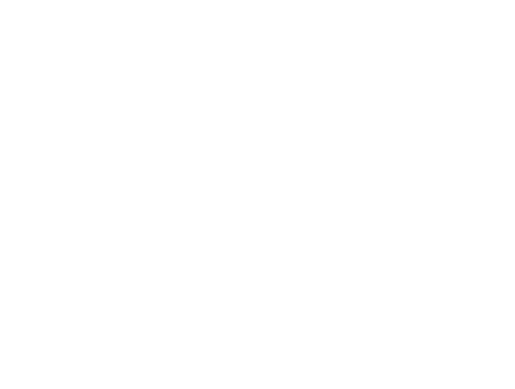

In [31]:
# plot_tree(decisionTree,feature_names=X.columns,class_names=['0','1'],filled=True)
# plt.show()

In [32]:
#finding accuracy
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ", accuracy)

accuracy:  0.98
